# Australia Cenozoic paleomagnetic APWPs inverted using `bayesian_pep` approach

The code is a PyMC3 implementation of the paleomagnetic Euler pole inversion method first developed in PyMC2 within Ian Rose's mcplates package: https://github.com/ian-r-rose/mcplates

The functions are within the `bayesian_pep` library which is imported below.

In [2]:
import os, sys
import textwrap
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import matplotlib.pyplot as plt
from matplotlib.container import ErrorbarContainer
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import seaborn as sns

from bayesian_pep import *

%config InlineBackend.figure_format = 'retina'

## import paleomagnetic pole compilation for Cenozoic Australia

In [2]:
def plot_poles_colorbar(map_axis, plons, plats, A95s, colorvalues, vmin, vmax,
                        colormap='viridis', edgecolor='k', marker='o', markersize=20,
                        alpha=1.0, colorbar=True, colorbar_label='pole ages (Ma)',
                        outline='True',filled_pole=False, fill_alpha=1.0, shrink=0.75, label=None):
    color_mapping = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    colors = color_mapping.to_rgba(colorvalues).tolist()

    ipmag.plot_poles(map_axis, plons, plats, A95s,
               label=label, color=colors, edgecolor=edgecolor, marker=marker,
               markersize=markersize,filled_pole=filled_pole,outline=outline,
               fill_color=colors, fill_alpha=fill_alpha)

    if colorbar == True:
        sm = plt.cm.ScalarMappable(
            cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
        sm._A = []
        cb = plt.colorbar(sm, orientation='vertical', shrink=shrink,
                     pad=0.1)
        cb.ax.set_title(colorbar_label, fontdict={'fontsize':11}, pad=10)

In [3]:
Aus_ref_lat = -25.34
Aus_ref_lon = 131.03

Aus_poles = pd.read_csv('./data/Australia_poles/Australia_Cenozoic_poles.csv')
#Aus_poles = Aus_poles[0:7]

Aus_poles['Paleolat'] = 0
Aus_poles['Age_error'] = 0

for n in range(0,len(Aus_poles)):
    Aus_poles['Paleolat'][n] = ipmag.lat_from_pole(Aus_ref_lon, Aus_ref_lat, 
                                                   Aus_poles['PLon'][n], Aus_poles['PLat'][n])
    Aus_poles['Age_error'][n] = Aus_poles['AgeNominal'][n] - Aus_poles['AgeUpper'][n]
    
Aus_poles = Aus_poles.sort_values(by='AgeNominal', ascending=0, ignore_index=1)
color_map = plt.cm.ScalarMappable(cmap='viridis_r', norm=plt.Normalize(vmin=Aus_poles['AgeNominal'].min(), vmax=Aus_poles['AgeNominal'].max()))
Aus_poles['color'] = color_map.to_rgba(Aus_poles['AgeNominal']).tolist()
    
Aus_poles

,PoleName,Rock type,SLat,SLon,PLat,PLon,A95,K,N,PmagRef,AgeNominal,AgeLower,AgeUpper,AgeInfo,AgeRef,Gaussian_2sigma,GaussianOrUniform,Paleolat,Age_error,color
0,North Rankin 1 Drill- core,sedimentary,-19.6,116.1,61.7,298.4,5.1,NaN,20.0,Idnurm1985a,59.750,57.0,62.50,the presence of G. angulata and G. pseudomardi...,NaN,NaN,uniform,-52,-2,"[0.267004, 0.004874, 0.329415, 1.0]"
1,Browns Creek Formation,sedimentary,NaN,NaN,65.5,292.5,2.5,99.9,33.0,Idnurm1994a,35.500,36.2,34.90,Based on biostratigraphy and magnetostratigrap...,NaN,NaN,uniform,-48,0,"[0.162142, 0.474838, 0.55814, 1.0]"
2,Hillsborough Volcano,igneous,-21.2,148.9,67.1,301.4,7.1,32.2,14.0,Hansma2019,33.600,33.1,34.10,Ar-Ar k-spar date,Cohen2013a,0.5,gaussian,-47,0,"[0.149039, 0.508051, 0.55725, 1.0]"
3,Peak Range,igneous,-22.5,147.8,64.6,291.8,8.8,10.1,29.0,Hansma2019,29.650,28.2,31.10,Ar-Ar dates of 30.7 +/- 0.4; 30.3 +/- 0.4; 30....,Cohen2013a,NaN,uniform,-48,-1,"[0.127568, 0.566949, 0.550556, 1.0]"
4,Springsure Volcano,igneous,-24.2,148.2,70.5,300.6,9.7,13.7,18.0,Hansma2019,28.100,27.8,28.40,Ar-Ar Sanidine,Cohen2013a,0.3,gaussian,-44,0,"[0.121148, 0.592739, 0.544641, 1.0]"
5,Pt. Addis Limestone,sedimentary,-38.4,144.3,68.5,299.4,4.8,47.8,4.8,Idnurm1985a,25.100,22.4,27.80,Ar-Ar and biostratigraphic,Idnurm1985a; McLaren et al. 2009a,NaN,uniform,-46,-2,"[0.12478, 0.640461, 0.527068, 1.0]"
6,Tweed Volcano,igneous,NaN,NaN,77.4,306.9,5.4,15.4,48.0,as compiled in Hansma2019,23.900,23.1,24.70,6 Ar-Ar dates,Knesel2008a,NaN,uniform,-37,0,"[0.134692, 0.658636, 0.517649, 1.0]"
7,Main Range Volcano,igneous,NaN,NaN,76.6,271.6,6.1,23.5,25.0,as compiled in Hansma2019,23.450,20.2,26.70,3 Ar-Ar dates with uniform distribution extend...,Knesel2008a,NaN,uniform,-35,-3,"[0.14021, 0.665859, 0.513427, 1.0]"
8,leucitite lavas,igneous,NaN,NaN,80.2,275.4,8.6,20.5,15.0,Hansma2018a,16.000,15.0,17.00,Ar-Ar dates with range assigned by Hansma2018,NaN,NaN,uniform,-33,-1,"[0.327796, 0.77398, 0.40664, 1.0]"
9,Glenample Fm./Port Campbell Lst.,sedimentary,-38.7,143.1,77.2,303.5,3.9,40.7,30.0,Idnurm1985a,13.000,9.0,17.00,chronostratigraphy inferred from biostratigrap...,Dickinson2002,NaN,uniform,-38,-4,"[0.440137, 0.811138, 0.340967, 1.0]"


## Plot prior age information on the poles

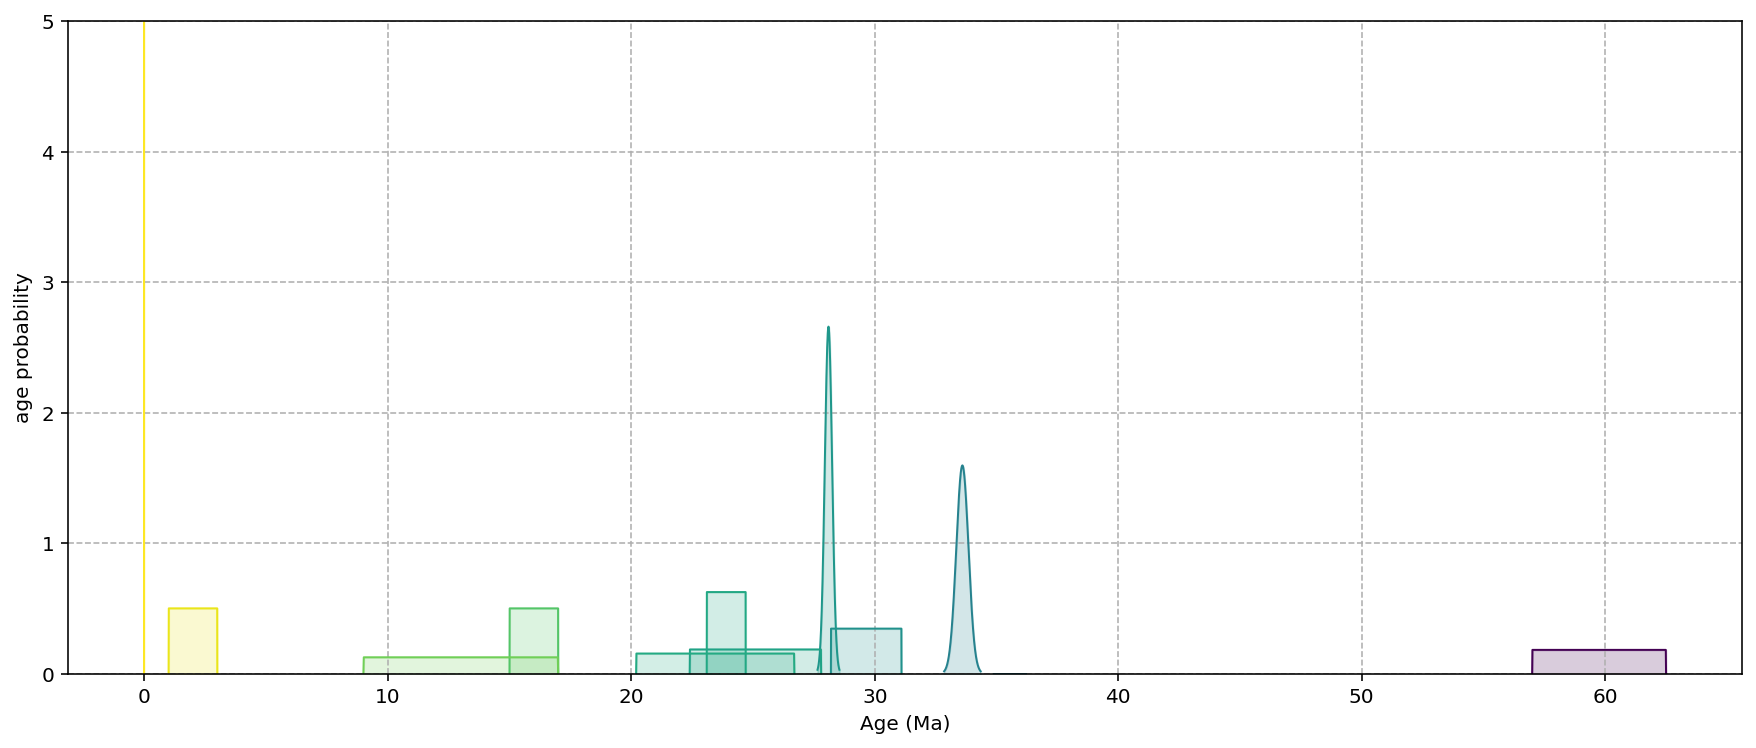

In [4]:
plt.figure(figsize = (15, 6))
plt.ylabel('age probability')
plt.xlabel('Age (Ma)')

for i in range(Aus_poles.shape[0]):
        
    if Aus_poles['GaussianOrUniform'][i] == 'uniform':
        x = np.linspace(Aus_poles['AgeLower'][i], Aus_poles['AgeUpper'][i], 500)
        y = np.zeros(500)
        y[(x< Aus_poles['AgeUpper'][i]) & (x>Aus_poles['AgeLower'][i])] = 1.0/(Aus_poles['AgeUpper'][i]-Aus_poles['AgeLower'][i])
    else: 
        mu = Aus_poles['AgeNominal'][i]
        sigma = Aus_poles['Gaussian_2sigma'][i]/2
        x = np.linspace(mu-3*sigma,mu+3*sigma, 1000)
        y = st.norm.pdf(x, mu, sigma)
    plt.plot(x, y, color = Aus_poles['color'][i], lw=1)
    plt.fill_between(x, y, color = Aus_poles['color'][i], alpha = 0.2)
plt.ylim(0, 5)
plt.grid(1, ls='--')

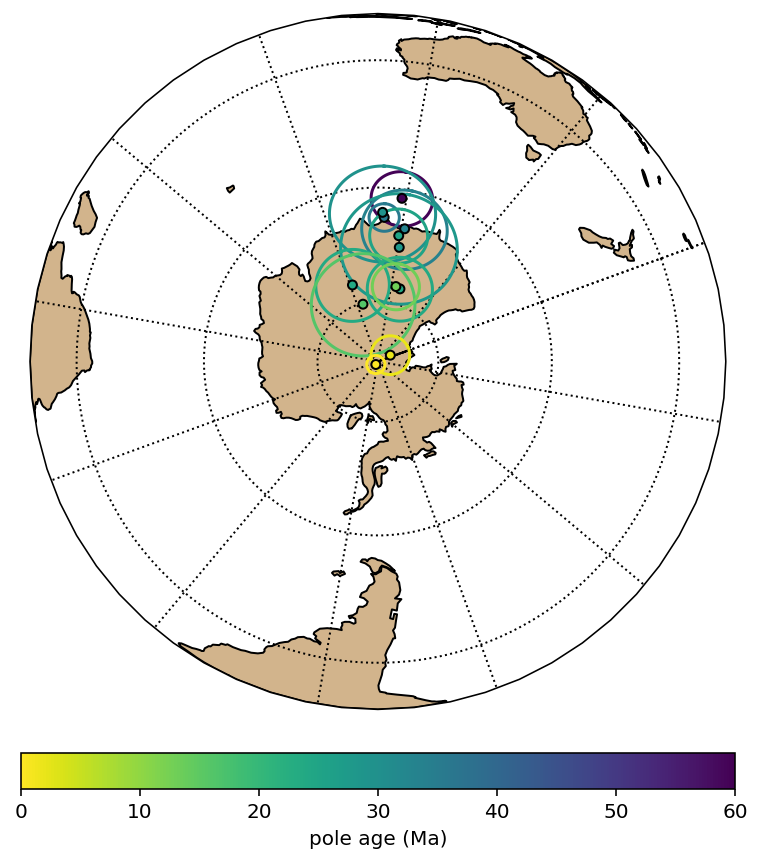

In [5]:
map_axis = ipmag.make_orthographic_map(central_longitude=110, central_latitude=-90)

ipmag.plot_poles_colorbar(map_axis,(Aus_poles['PLon']+180).tolist(),
                          (-Aus_poles['PLat']).tolist(),
                          Aus_poles['A95'].tolist(),
                          Aus_poles['AgeNominal'].tolist(),
                          0,60,colormap='viridis_r')

## import global plate model APWs based on seafloor data

The data are from Müller, R. D., Seton, M., Zahirovic, S., Williams, S. E., Matthews, K. J., Wright, N. M., ... & Cannon, J. (2016). Ocean basin evolution and global-scale plate reorganization events since Pangea breakup. Annual Review of Earth and Planetary Sciences, 44, 107-138. DOI:10.1146/annurev-earth-060115-012211

In [6]:
Muller_path = np.loadtxt('./data/Australia_poles/australia_apw_muller_2016.txt')

In [7]:
Muller_paleolat = []

for n in range(0,len(Muller_path)):
    paleolat = ipmag.lat_from_pole(Aus_ref_lon, Aus_ref_lat,Muller_path[:,1][n],Muller_path[:,2][n])
    Muller_paleolat.append(-paleolat)

### get full pole motion rate from global model

Muller_rate = [pmag.angle([Muller_path[:,1][i], Muller_path[:,2][i]], [Muller_path[:,1][i+1], Muller_path[:,2][i+1]])  /
               Muller_path[:,0][i+1] - Muller_path[:,0][i]
               for i in range(len(Muller_path)-1)]

In [8]:
Muller_df = pd.DataFrame(Muller_path, columns = ['age','pole_lon', 'pole_lat', 'Euler_rate', 'Euler_lon', 'Euler_lat'])
Muller_df = Muller_df[Muller_df['age'] > 0]
Muller_df.reset_index(inplace=True)
Muller_rate_young = Muller_df[Muller_df['age'] < 38]
Muller_rate_old = Muller_df[Muller_df['age'] >= 38]
Muller_df.head()

,index,age,pole_lon,pole_lat,Euler_rate,Euler_lon,Euler_lat
0,1,0.301508,126.521282,-89.788048,-0.739211,36.488665,17.107010
1,2,0.603015,126.543331,-89.576063,-0.739256,36.467631,17.088976
2,3,0.904523,126.565342,-89.364045,-0.739301,36.446611,17.070948
3,4,1.206030,126.587313,-89.151994,-0.739345,36.425602,17.052925
4,5,1.507538,126.609246,-88.939910,-0.739390,36.404606,17.034909


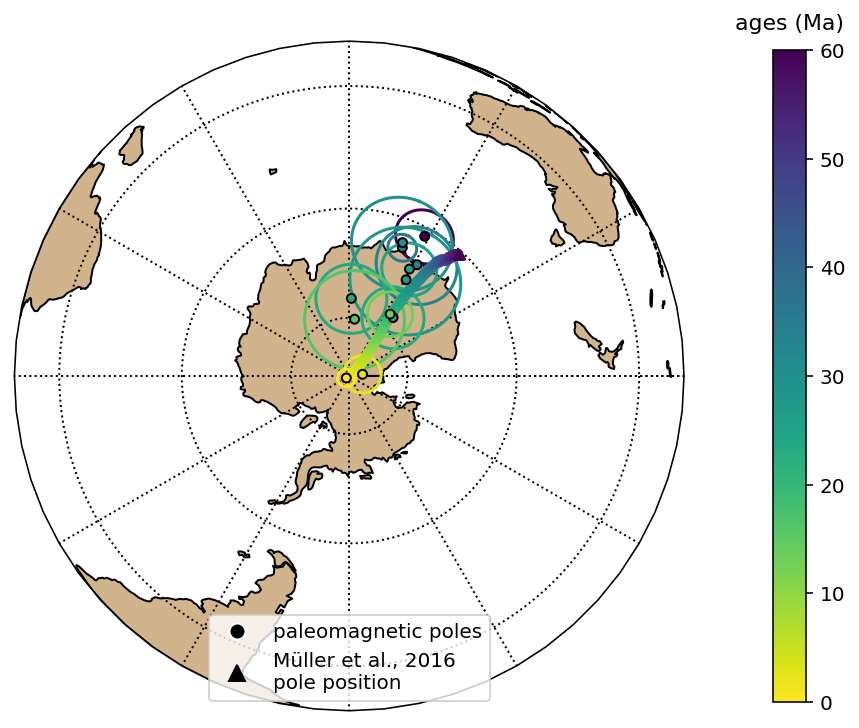

In [9]:
map_axis = ipmag.make_orthographic_map(central_longitude=90, central_latitude=-90, figsize=(8,8))

plot_poles_colorbar(map_axis,Muller_path[:,1],
                          Muller_path[:,2],
                          np.zeros(len(Muller_path)),
                          Muller_path[:,0],
                          0,60,colormap='viridis_r',
                          markersize=20,marker='^',edgecolor=None,colorbar=1, colorbar_label='ages (Ma)', shrink=0.75)

plot_poles_colorbar(map_axis,(Aus_poles['PLon']+180).tolist(),
                          (-Aus_poles['PLat']).tolist(),
                          Aus_poles['A95'].tolist(),
                          Aus_poles['AgeNominal'].tolist(),
                          0,60,colormap='viridis_r',colorbar=False)

# map_axis.legend(handles=[err], labels=["my custom label"], 
#           loc='upper left' ,bbox_to_anchor=(1, 1)  )
patch = Line2D([], [], marker='o', color='w', label='paleomagnetic poles', linestyle='None',
                          markerfacecolor='k', markersize=8)
triangle = Line2D([], [], color='k', marker='^', linestyle='None',
                          markersize=8, label = 'Müller et al., 2016\npole position')

plt.legend(handles=[patch, triangle], loc=8)
plt.savefig('./code_output/aus_cenozoic_pole_apw.png', dpi=600, bbox_inches='tight')

## Apply Bayesian inversion on compiled paleomagnetic poles

In [10]:
with pm.Model() as model:

    euler_1 = Watson_Girdle('euler_1', lon_lat = [1.,1.,], k = -.1, testval = np.array([0., 0.]), shape = 2)
    rate_1 = pm.Uniform('rate_1', 0, 4) 
    euler_2 = Watson_Girdle('euler_2', lon_lat = [1.,1.,], k = -.1, testval = np.array([0., 0.]), shape = 2)
    rate_2 = pm.Uniform('rate_2', 0, 4) 
    
    start_index = Aus_poles['AgeNominal'].argmax()
    
    start_age = pm.Normal('start_pole_age', Aus_poles['AgeNominal'].max(), 0.1)
    print('starting pole age is: ', str(Aus_poles['AgeNominal'].max()))
    
    start_lon_lat = [Aus_poles['PLon'].tolist()[start_index], Aus_poles['PLat'].tolist()[start_index]]
    start_k = kappa_from_two_sigma(Aus_poles['A95'].tolist()[start_index])
    
    start = VMF('start_pole', lon_lat=start_lon_lat, 
                k = start_k, testval = np.array(start_lon_lat), shape = 2)
    
    print('starting pole lon/lat:', start_lon_lat, 'starting pole k: ',start_k)
    
    switchpoint = pm.Uniform('switchpoint', Aus_poles['AgeNominal'].min(), Aus_poles['AgeNominal'].max())

    for i in range(Aus_poles.shape[0]):
        
        if Aus_poles['GaussianOrUniform'][i] == 'uniform':
            age = pm.Uniform('t'+str(i), Aus_poles['AgeLower'][i], Aus_poles['AgeUpper'][i])
        else: 
            age = pm.Normal('t'+str(i), mu=Aus_poles['AgeNominal'][i], sigma = Aus_poles['Gaussian_2sigma'][i]/2)
            mu = Aus_poles['AgeNominal'][i]
            sigma = Aus_poles['Gaussian_2sigma'][i]/2
        
        print('pole '+str(i)+' age: ',Aus_poles['AgeNominal'][i])
        
        lon_lat = pole_position_2e(start, euler_1, rate_1, euler_2, rate_2, switchpoint, start_age, age)

        observed_pole = VMF('p'+str(i), lon_lat, k = kappa_from_two_sigma(Aus_poles['A95'].tolist()[i]), 
                            observed=[Aus_poles['PLon'].tolist()[i], Aus_poles['PLat'].tolist()[i]])
        
        
#     trace_2e = pm.sample(50000, step = pm.Metropolis(), compute_convergence_checks=1, chains =1, cores=1, init='auto')

starting pole age is:  59.75
starting pole lon/lat: [298.4, 61.7] starting pole k:  753.5563244905807
pole 0 age:  59.75
pole 1 age:  35.5
pole 2 age:  33.6
pole 3 age:  29.65
pole 4 age:  28.1
pole 5 age:  25.1
pole 6 age:  23.9
pole 7 age:  23.45
pole 8 age:  16.0
pole 9 age:  13.0
pole 10 age:  2.0
pole 11 age:  0.005


### save trace

In [11]:
# pm.save_trace(trace_2e, 'code_output/aus_2_euler_trace', overwrite=1)

### import saved trace

In [12]:
trace_2e_saved = pm.load_trace('code_output/aus_2_euler_trace',model)

In [13]:
# plt.figure(figsize=(10, 20))
# axes = pm.traceplot(trace_2e_saved, compact=1)
# plt.subplots_adjust(hspace = 1 )
# plt.savefig('code_output/aus_2_euler_inversion_traceplot.pdf', bbox_inches='tight')

### plot posterior switchpoint age distribution

### plot latitudinal drift

In [14]:
def plot_poles_2e( trace, lon_lats, A95s, ages, central_lon = 30., central_lat = 30., num_paths_to_plot = 500, 
                  savefig = True, figname = '2_Euler_inversion_test.pdf', path_resolution=100, **kwargs):
    def pole_position( start, euler_1, rate_1, euler_2, rate_2, switchpoint, start_age, age ):

        euler_pole_1 = EulerPole( euler_1[0], euler_1[1], rate_1)
        euler_pole_2 = EulerPole( euler_2[0], euler_2[1], rate_2)
        start_pole = PaleomagneticPole(start[0], start[1], age=start_age)

        if age > switchpoint:
            start_pole.rotate( euler_pole_1, euler_pole_1.rate*(start_age-age))
        else:
            start_pole.rotate( euler_pole_1, euler_pole_1.rate*(start_age-switchpoint))
            start_pole.rotate( euler_pole_2, euler_pole_2.rate*(switchpoint-age))

        lon_lat = np.ndarray.flatten(np.array([start_pole.longitude, start_pole.latitude]))

        return lon_lat
    
    euler_1_directions = trace.euler_1
    rates_1 = trace.rate_1

    euler_2_directions = trace.euler_2
    rates_2 = trace.rate_2

    start_directions = trace.start_pole
    start_ages = trace.start_pole_age
    switchpoints = trace.switchpoint
    
    interval = max([1,int(len(rates_1)/num_paths_to_plot)])
    
    age_list = np.linspace(ages[0], ages[-1], path_resolution)
#     pathlons = np.empty_like(age_list)
#     pathlats = np.empty_like(age_list)
    lats = []
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8,6), sharex='col', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
    for start, e1, r1, e2, r2, switch, start_age \
                 in zip(start_directions[::interval], 
                        euler_1_directions[::interval], rates_1[::interval],
                        euler_2_directions[::interval], rates_2[::interval],
                        switchpoints[::interval], start_ages[::interval]):
#         pathlons = np.empty_like(age_list)
        pathlats = np.empty_like(age_list)
        for i,a in enumerate(age_list):
            lon_lat = pole_position( start, e1, r1, e2, r2, switch, start_age, a)
#             pathlons[i] = lon_lat[0]
            pathlats[i] = lon_lat[1]

        lats.append(pathlats)
        old_ages = [age_list[i] if age_list[i] > switch else None for i in range(len(age_list))]
        old_lats = [-pathlats[i] if age_list[i] > switch else None for i in range(len(age_list))]
        young_ages = [age_list[i] if age_list[i] <= switch else None for i in range(len(age_list))]
        young_lats = [-pathlats[i] if age_list[i] <= switch else None for i in range(len(age_list))]
        ax1.plot(young_ages,young_lats,color='r', alpha=0.05)
        ax1.plot(old_ages,old_lats,color='b',  alpha=0.05)
    
    switchpoint_max_1 = np.percentile(trace['switchpoint'],97.5)
    switchpoint_min_1 = np.percentile(trace['switchpoint'],2.5)
    switchpoint_median_1 = np.median(trace['switchpoint'])
    print(switchpoint_median_1, switchpoint_min_1, switchpoint_max_1)

    sns.distplot(trace['switchpoint'],kde=False, hist_kws={'density':1}, bins=40, color = 'C1', label='changepoint between\nolder and younger Euler')
    
    ax1.set_ylabel('Pole latitude ($^\circ$)')
    
    ax2.axvline(x=switchpoint_median_1, color = 'C1')
    ax2.axvline(x=switchpoint_min_1,linestyle='--', color = 'C1')
    ax2.axvline(x=switchpoint_max_1,linestyle='--', color = 'C1')
    ax2.text(35, 0.08,  str(round(switchpoint_median_1,1))+ ' Ma', horizontalalignment = 'center', color = 'C1', fontdict={'fontsize':11})
    ax2.set_xlabel('rate ($^\circ$/Myr)')
    ax2.set_ylabel('probability density')

    return fig, ax1, ax2


40.821723330466405 29.525668342088206 51.33307620331715


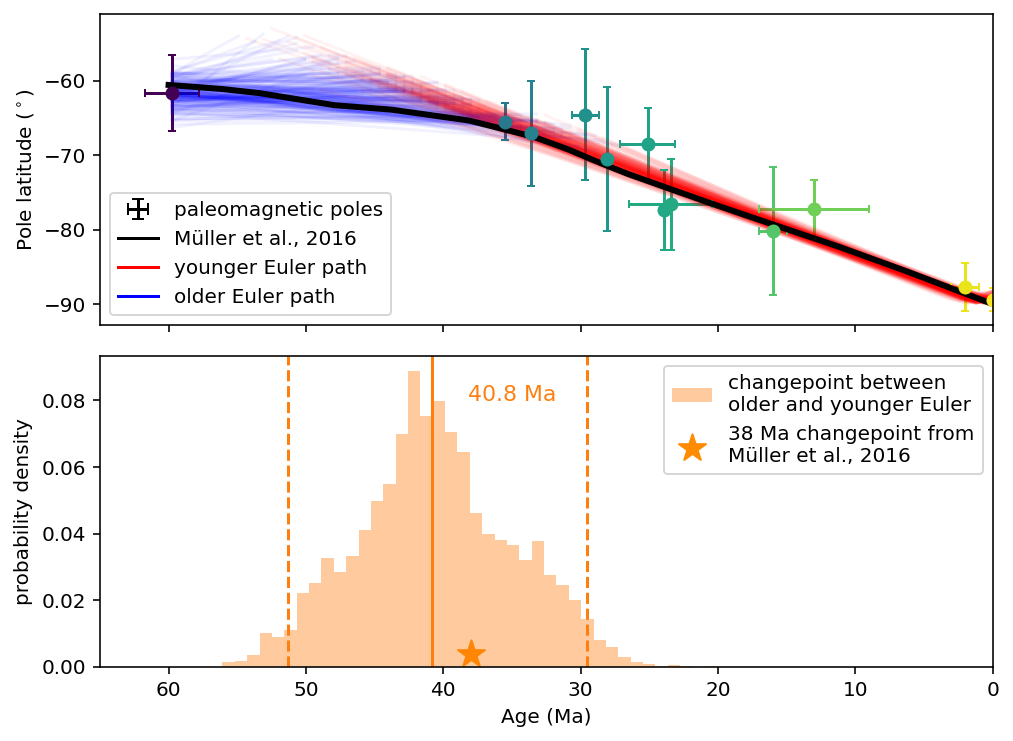

In [15]:
_, ax1, ax2 = plot_poles_2e(trace_2e_saved, Aus_poles[['PLon', 'PLat']].to_numpy(), Aus_poles['A95'], Aus_poles['AgeNominal'].tolist(),
              central_lon=180, central_lat=90, num_paths_to_plot=200, 
                  savefig = False);
# plot paleomagnetic observation poles here
cNorm  = matplotlib.colors.Normalize(vmin=min(Aus_poles['AgeNominal']), vmax=max(Aus_poles['AgeNominal']))
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')

pole_colors = [colors.rgb2hex(scalarMap.to_rgba(Aus_poles['AgeNominal'][i])) for i in range(len(Aus_poles['AgeNominal']))]
        
# cbar = plt.colorbar(scalarMap, shrink=1, location='bottom', pad=0.)
# cbar.ax.set_xlabel('Age (Ma)', fontsize=12) 

for i in range(len(pole_colors)):
    ax1.errorbar(Aus_poles['AgeNominal'][i],-Aus_poles['PLat'][i],yerr=Aus_poles['A95'][i],xerr=Aus_poles['Age_error'][i],
                fmt='o', color=pole_colors[i], capsize=2)

ax1.plot(Muller_path[:,0],Muller_path[:,2],linewidth=3,alpha=1, color = 'k', label='Müller et al., 2016')

line = Line2D([],[], ls='none', color='k')
barline = LineCollection(np.empty((2,2,2)), color='k')
err = ErrorbarContainer((line, [line], [barline]), has_xerr=True, has_yerr=True, label = 'paleomagnetic poles')

Muller_line = Line2D([0],[0], color='k', label = 'Müller et al., 2016')
young_line = Line2D([0],[0], color='r', label = 'younger Euler path')
old_line = Line2D([0],[0], color='b', label = 'older Euler path')

# plt.xticks([])
ax1.set_xlim(65,0)
ax2.set_xlim(65,0)
ax2.scatter(38, ax2.get_ylim()[1]*0.04, marker = '*', s=200, color = 'darkorange', label='38 Ma changepoint from\nMüller et al., 2016')
plt.xlabel('Age (Ma)')

ax1.legend(handles = [err, Muller_line, young_line, old_line], loc='lower left')
ax2.legend()
plt.savefig('./code_output/aus_lat_rate.png', dpi=600, bbox_inches='tight')
plt.show()

0.31747105318254143 0.017184722642092316 2.9946058149512162
0.817259887234922 0.667130939611502 1.8809727446802456


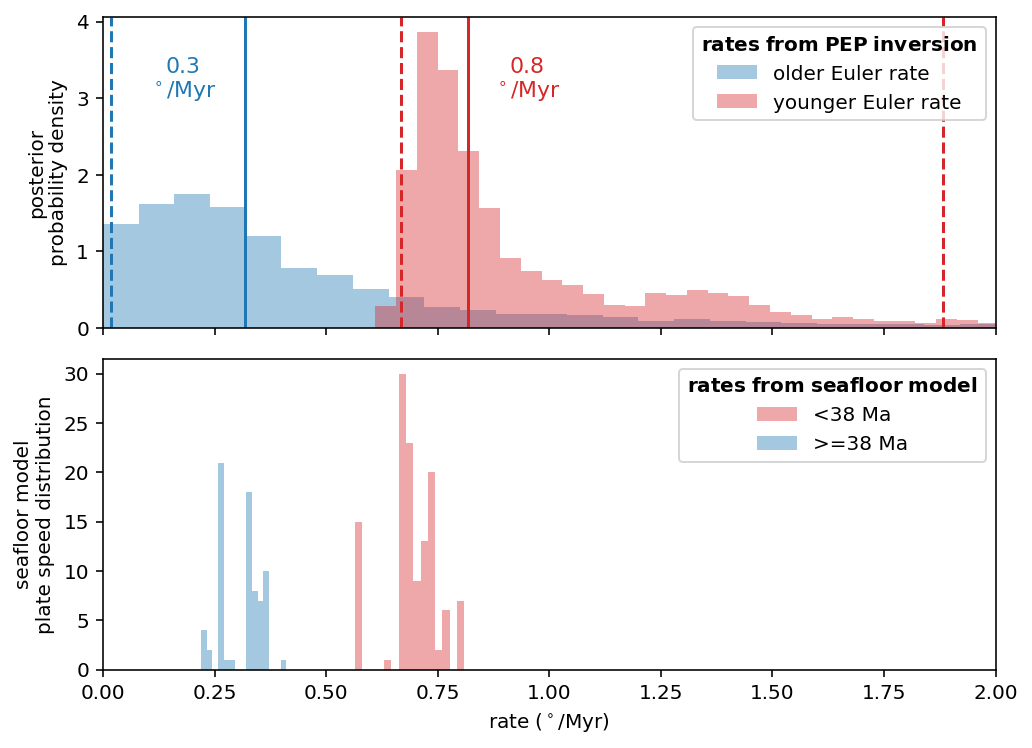

In [16]:
HPD_max_1 = np.percentile(trace_2e_saved['rate_1'],97.5)
HPD_min_1 = np.percentile(trace_2e_saved['rate_1'],2.5)
median_1 = np.median(trace_2e_saved['rate_1'])
print(median_1, HPD_min_1, HPD_max_1)

HPD_max_2 = np.percentile(trace_2e_saved['rate_2'],97.5)
HPD_min_2 = np.percentile(trace_2e_saved['rate_2'],2.5)
median_2 = np.median(trace_2e_saved['rate_2'])
print(median_2, HPD_min_2, HPD_max_2)

_, (ax3, ax4) = plt.subplots(nrows=2, figsize=(8,6), sharex='col', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

sns.distplot(trace_2e_saved['rate_1'],kde=False, hist_kws={'density':1}, bins=50, color = 'C0', ax=ax3,  label='older Euler rate')
sns.distplot(trace_2e_saved['rate_2'],kde=False, hist_kws={'density':1}, bins=40, color = 'C3', ax=ax3,  label='younger Euler rate')

ax3.axvline(x=median_1)
ax3.axvline(x=HPD_min_1,linestyle='--')
ax3.axvline(x=HPD_max_1,linestyle='--')

ax3.axvline(x=median_2, color = 'C3')
ax3.axvline(x=HPD_min_2,linestyle='--', color = 'C3')
ax3.axvline(x=HPD_max_2,linestyle='--', color = 'C3')

ax3.text(0.18, 3., str(round(median_1,1))+ '\n$^\circ$/Myr', horizontalalignment = 'center', color = 'C0', fontdict={'fontsize':11})
ax3.text(0.95, 3., str(round(median_2,1))+ '\n$^\circ$/Myr', horizontalalignment = 'center' ,color = 'C3', fontdict={'fontsize':11})

ax3.set_ylabel('posterior\nprobability density')
ax3.legend(title="$\\bf{rates\;from\;PEP\;inversion}$",loc='upper right')

sns.distplot(np.abs(Muller_rate_young['Euler_rate']),kde=False, bins=15, color = 'C3', ax=ax4, label='<38 Ma')
sns.distplot(np.abs(Muller_rate_old['Euler_rate']),kde=False, bins=15, color = 'C0', ax=ax4, label='>=38 Ma')

ax4.set_xlabel('rate ($^\circ$/Myr)')
ax4.set_ylabel('seafloor model\nplate speed distribution')
ax4.legend(title="$\\bf{rates\;from\;seafloor\;model}$")
# ax3.xlabel('rate ($^\circ$/Myr)')

plt.xlim(0,2.)
plt.savefig('code_output/aus_full_rate.png',dpi=600,bbox_inches='tight')

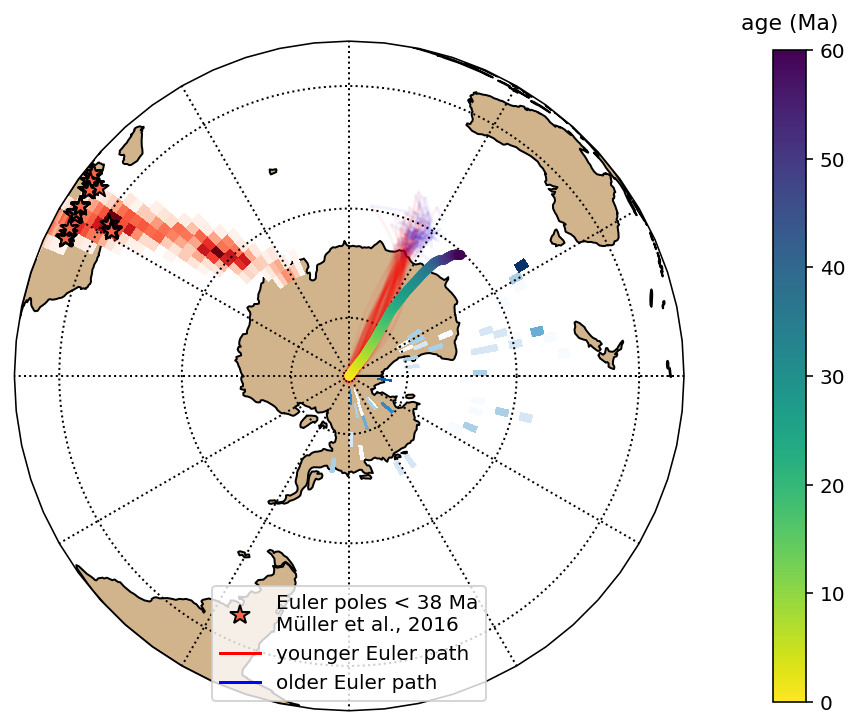

In [17]:
trace = trace_2e_saved
num_paths_to_plot = 100
central_lon = 90
central_lat = -90
A95s = Aus_poles['A95']
ages = Aus_poles['AgeNominal'].tolist()
path_resolution=100

def pole_position( start, euler_1, rate_1, euler_2, rate_2, switchpoint, start_age, age ):

        euler_pole_1 = EulerPole( euler_1[0], euler_1[1], rate_1)
        euler_pole_2 = EulerPole( euler_2[0], euler_2[1], rate_2)
        start_pole = PaleomagneticPole(start[0], start[1], age=start_age)

        if age > switchpoint:
            start_pole.rotate( euler_pole_1, euler_pole_1.rate*(start_age-age))
        else:
            start_pole.rotate( euler_pole_1, euler_pole_1.rate*(start_age-switchpoint))
            start_pole.rotate( euler_pole_2, euler_pole_2.rate*(switchpoint-age))

        lon_lat = np.ndarray.flatten(np.array([start_pole.longitude, start_pole.latitude]))

        return lon_lat

euler_1_directions = trace.euler_1
rates_1 = trace.rate_1

euler_2_directions = trace.euler_2
rates_2 = trace.rate_2

start_directions = trace.start_pole
start_ages = trace.start_pole_age
switchpoints = trace.switchpoint

interval = max([1,int(len(rates_1)/num_paths_to_plot)])

#ax = plt.axes(projection = ccrs.Orthographic(0.,30.))
ax = ipmag.make_orthographic_map(central_lon, central_lat, add_land=1, grid_lines = 1, figsize=(8,8))
ipmag.plot_poles(ax,Muller_rate_young['Euler_lon'].tolist(),
                 [-i for i in Muller_rate_young['Euler_lat'].tolist()],
                 np.zeros(Muller_rate_young.shape[0]),
                 markersize=90, marker='*', edgecolor='k', color = 'tomato',
                 label='')

plot_poles_colorbar(ax,Muller_path[:,1],
                          Muller_path[:,2],
                          np.zeros(len(Muller_path)),
                          Muller_path[:,0],
                          0,60,colormap='viridis_r',
                          markersize=15,marker='o', fill_alpha = .3, colorbar=1, edgecolor=None, 
                    colorbar_label='age (Ma)')

plot_distributions(ax, euler_1_directions[:,0], euler_1_directions[:,1], resolution=75,cmap = 'Blues')
plot_distributions(ax, euler_2_directions[:,0]+180, -euler_2_directions[:,1], resolution=75, cmap = 'Reds')

age_list = np.linspace(ages[0], ages[-1], path_resolution)
pathlons = np.empty_like(age_list)
pathlats = np.empty_like(age_list)

for start, e1, r1, e2, r2, switch, start_age \
             in zip(start_directions[::interval], 
                    euler_1_directions[::interval], rates_1[::interval],
                    euler_2_directions[::interval], rates_2[::interval],
                    switchpoints[::interval], start_ages[::interval]):
    for i,a in enumerate(age_list):
        lon_lat = pole_position( start, e1, r1, e2, r2, switch, start_age, a)
        pathlons[i] = 180+lon_lat[0]
        pathlats[i] = -lon_lat[1]

    old_lons = [pathlons[i] if age_list[i] > switch else None for i in range(len(age_list))]
    old_lats = [pathlats[i] if age_list[i] > switch else None for i in range(len(age_list))]
    young_lons = [pathlons[i] if age_list[i] <= switch else None for i in range(len(age_list))]
    young_lats = [pathlats[i] if age_list[i] <= switch else None for i in range(len(age_list))]
        
    ax.plot(young_lons,young_lats,color='r', transform=ccrs.Geodetic(), alpha=0.05)
    ax.plot(old_lons,old_lats,color='b', transform=ccrs.Geodetic(), alpha=0.05)
    


Muller_euler = Line2D([],[], markerfacecolor='tomato', marker = '*', linestyle='None', markeredgecolor='k', markersize=10,
                  label = 'Euler poles < 38 Ma\nMüller et al., 2016')
young_line = Line2D([0],[0], color='r', label = 'younger Euler path')
old_line = Line2D([0],[0], color='b', label = 'older Euler path')

plt.legend(handles=[Muller_euler, young_line, old_line], loc=8)
plt.savefig('code_output/aus_2_Euler_inversion.png', dpi=600, bbox_inches='tight')

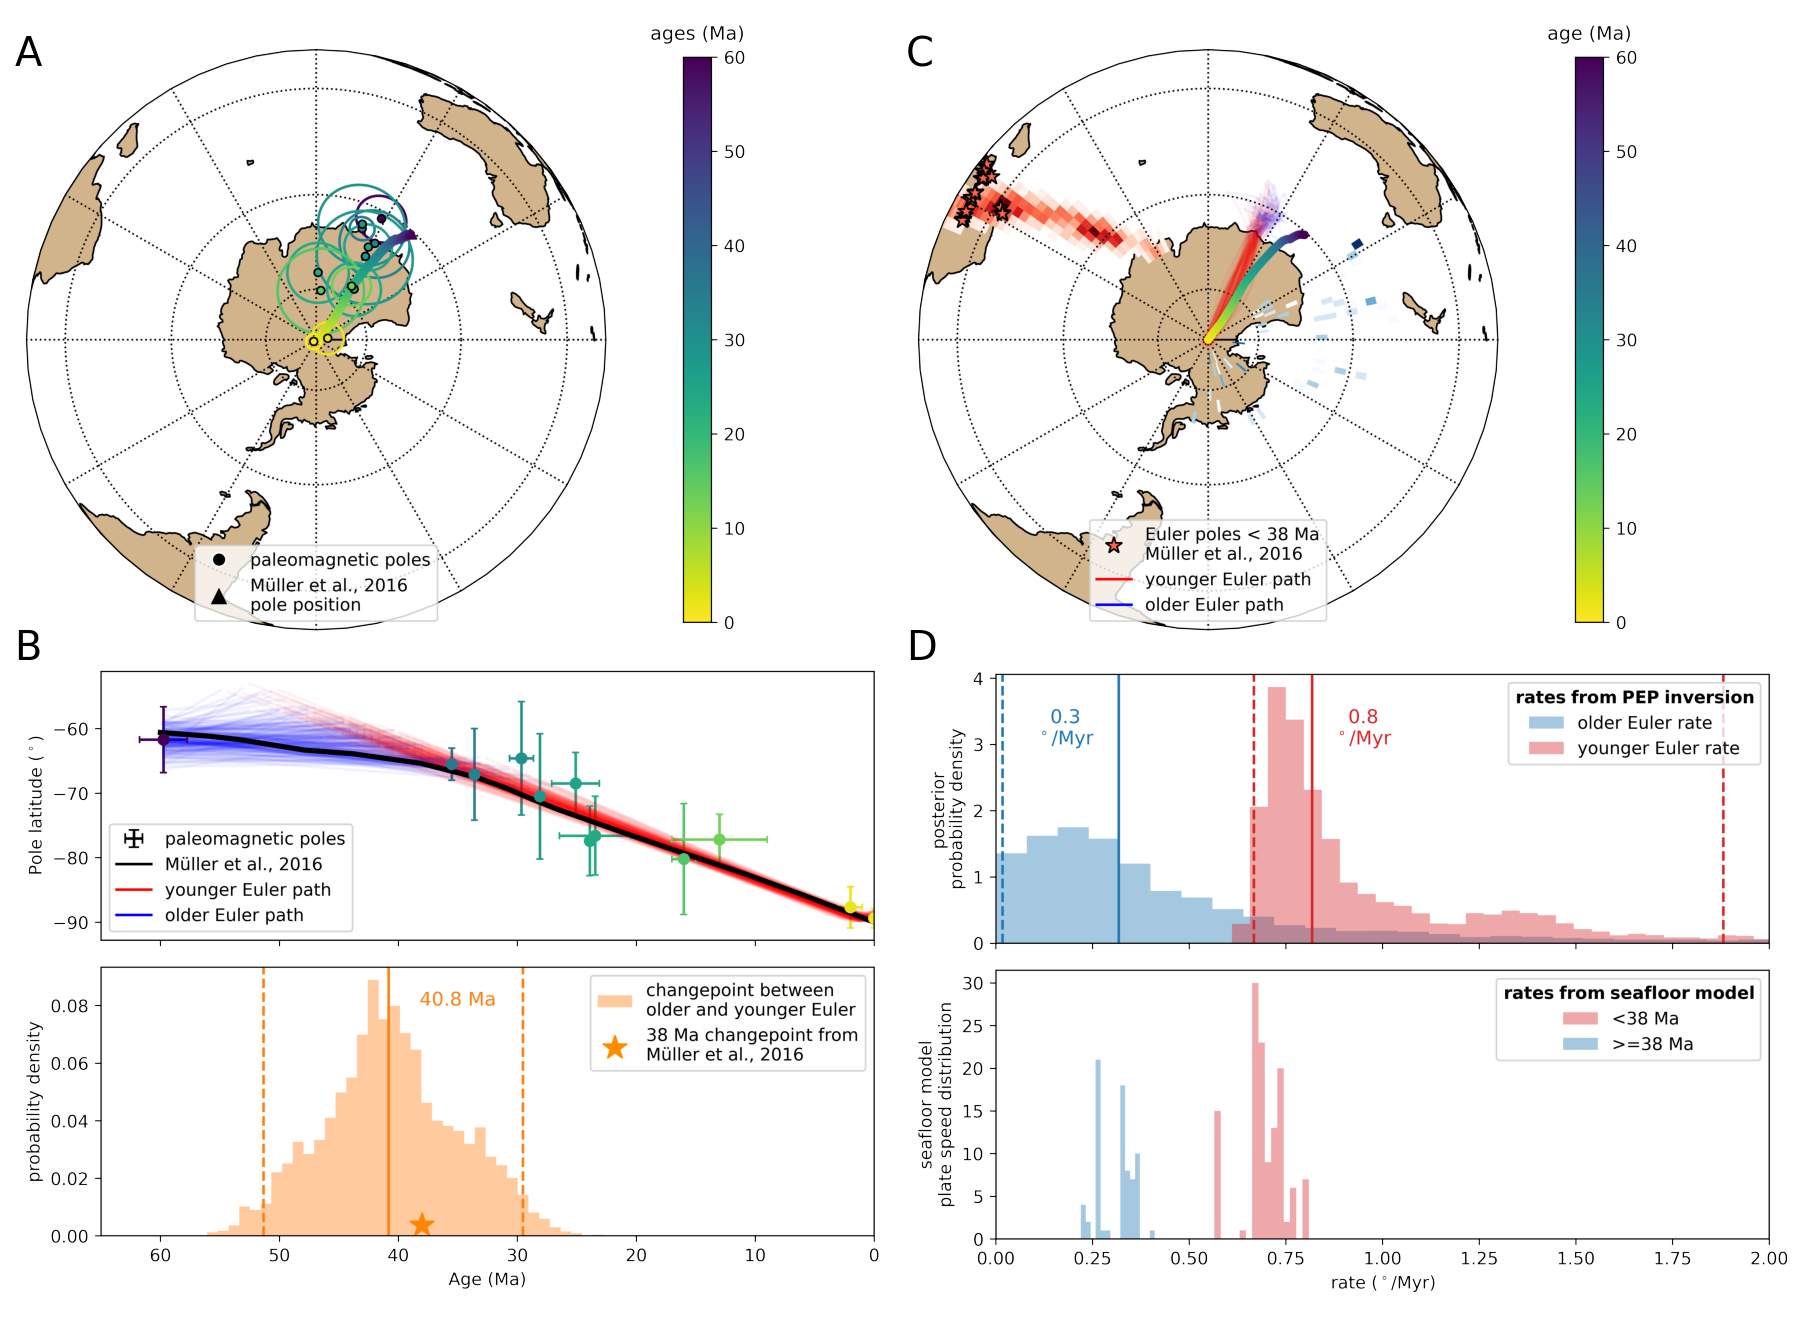

In [4]:
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.image as mpimg

previous_path_img = mpimg.imread('./code_output/aus_cenozoic_pole_apw.png')
previous_rate_img = mpimg.imread('./code_output/aus_lat_rate.png')

path_img = mpimg.imread('code_output/aus_2_Euler_inversion.png')
rate_img = mpimg.imread('code_output/aus_full_rate.png')

fig = plt.figure(figsize=(16., 16.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

i = 0
for ax, im in zip(grid, [previous_path_img, path_img,
                         previous_rate_img, rate_img]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.axis("off")
    if i == 0:
        ax.text(0,250,"A",fontsize=20)
    if i == 1:
        ax.text(0,250,"C",fontsize=20)    
    if i == 2:
        ax.text(0,0,"B",fontsize=20)
    if i == 3:
        ax.text(0,0,"D",fontsize=20)
    i = i + 1

plt.subplots_adjust(wspace=0.2, hspace=0)

plt.savefig('./code_output/fig_aus_inversion.png',dpi=600,bbox_inches='tight')
plt.show()